### Imports

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### Read Data

In [61]:
data = pd.read_csv("AmesHousing.csv")
data

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


### Information about the data

In [62]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


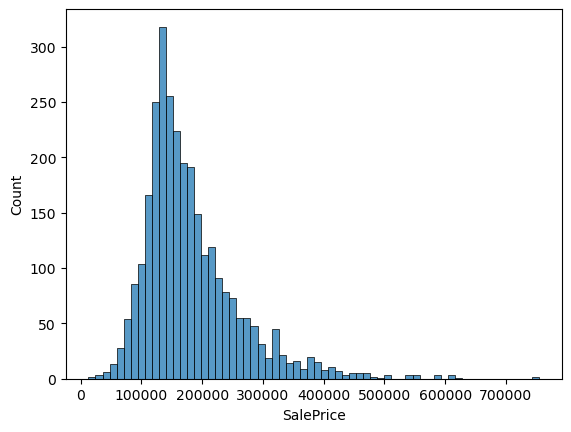

In [63]:
sns.histplot(data["SalePrice"])
plt.show()

### Features

In [64]:
data["House Age"] = data["Yr Sold"] - data["Year Built"]
data["Total Bathrooms"] = data["Full Bath"] + (data["Half Bath"]*0.5)
data["Total SF"] = data["Total Bsmt SF"] + data["1st Flr SF"] + data["2nd Flr SF"]

In [65]:
data = pd.get_dummies(data, columns=["Neighborhood", "Bldg Type", "Kitchen Qual"], drop_first=True)

In [66]:
missing_data = data.isnull().sum()
columns_to_drop = missing_data[missing_data > 25].index.tolist()
columns_to_drop.append("PID")
columns_to_drop.append("Order")
columns_to_drop.append("Yr Sold")
columns_to_drop.append("Mo Sold")

data = data.drop(columns=columns_to_drop)

### Preparing features (x) and targets (y) for the models

In [67]:
x = data.drop("SalePrice", axis=1)
y = data["SalePrice"]

In [68]:
numerical_columns = x.select_dtypes(include=[np.number]).columns
categorical_columns = x.select_dtypes(exclude=[np.number]).columns

In [69]:
numerical_imputer = SimpleImputer(strategy="median")
x[numerical_columns] = numerical_imputer.fit_transform(x[numerical_columns])

categorical_imputer = SimpleImputer(strategy="most_frequent")
x[categorical_columns] = categorical_imputer.fit_transform(x[categorical_columns])

In [70]:
x_encoded = pd.get_dummies(x, columns=categorical_columns)

x_train, x_test, y_train, y_test = train_test_split(x_encoded, y, test_size=0.2, random_state=42)

In [71]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

## Linear Regression

### Model

In [72]:
linear_regression = LinearRegression()
linear_regression.fit(x_train_scaled, y_train)
y_predict_linear_regression = linear_regression.predict(x_test_scaled)

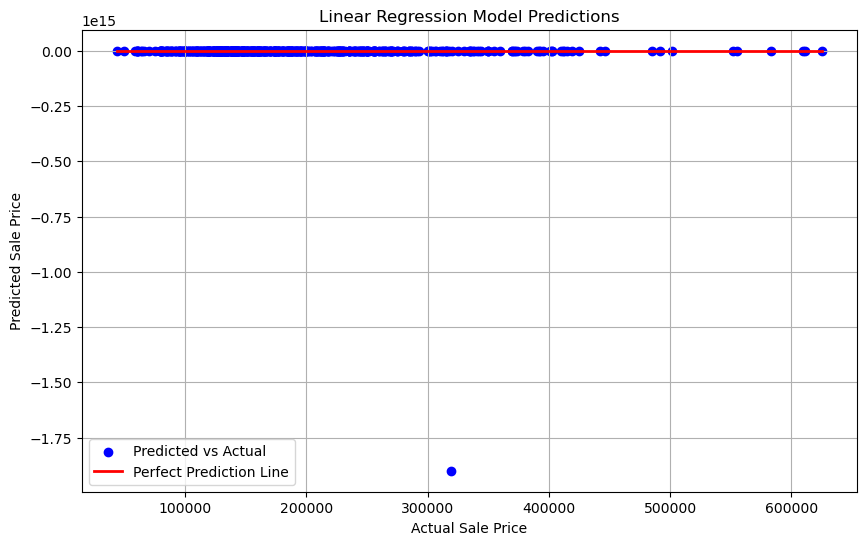

Linear Regression RMSE: 78481797379291.45, MAE: 3242053183917.932, R2: -7.682389395066307e+17


In [73]:

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_predict_linear_regression, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, label='Perfect Prediction Line')

plt.title('Linear Regression Model Predictions')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.legend()
plt.grid()
plt.show()

# Calculate and print evaluation metrics
rmse_lr = np.sqrt(mean_squared_error(y_test, y_predict_linear_regression))
mae_lr = mean_absolute_error(y_test, y_predict_linear_regression)
r2_lr = r2_score(y_test, y_predict_linear_regression)
print(f"Linear Regression RMSE: {rmse_lr}, MAE: {mae_lr}, R2: {r2_lr}")


### Evaluation

In [74]:
rmse_lr = np.sqrt(mean_squared_error(y_test, y_predict_linear_regression))
mae_lr = mean_absolute_error(y_test, y_predict_linear_regression)
r2_lr = r2_score(y_test, y_predict_linear_regression)
print(f"Linear Regression RMSE: {rmse_lr}, MAE: {mae_lr}, R2: {r2_lr}")

Linear Regression RMSE: 78481797379291.45, MAE: 3242053183917.932, R2: -7.682389395066307e+17


## Polynomial Features

### Model

In [75]:
polynomial_features = PolynomialFeatures(degree=2)
x_train_poly = polynomial_features.fit_transform(x_train_scaled)
x_test_poly = polynomial_features.transform(x_test_scaled)

polynomial_regression = LinearRegression()
polynomial_regression.fit(x_train_poly, y_train)
y_predict_polynomial_features = polynomial_regression.predict(x_test_poly)

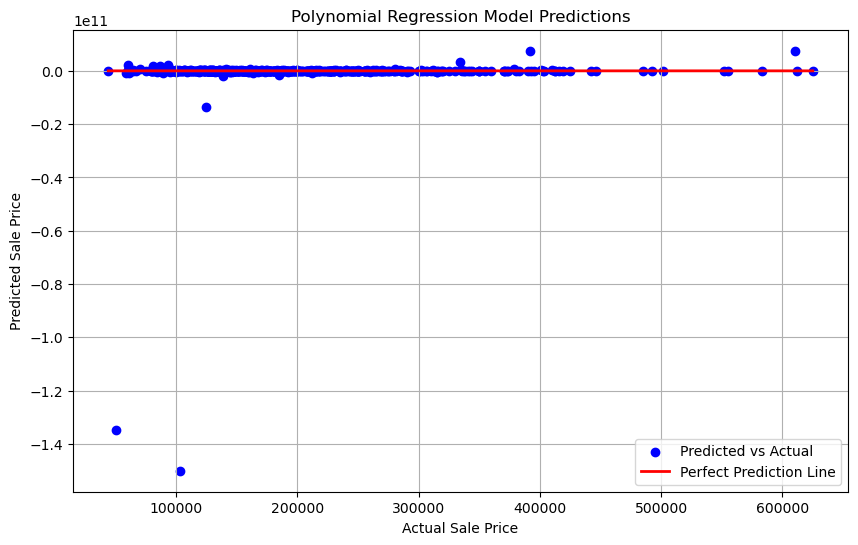

In [76]:
# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_predict_polynomial_features, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, label='Perfect Prediction Line')

plt.title('Polynomial Regression Model Predictions')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.legend()
plt.grid()
plt.show()

### Evaluation

In [77]:
rmse_poly = np.sqrt(mean_squared_error(y_test, y_predict_polynomial_features))
mae_poly = mean_absolute_error(y_test, y_predict_polynomial_features)
r2_poly = r2_score(y_test, y_predict_polynomial_features)
print(f"Polynomial Regression RMSE: {rmse_poly}, MAE: {mae_poly}, R2: {r2_poly}")

Polynomial Regression RMSE: 8370477437.580111, MAE: 652546480.3545471, R2: -8738942770.135366


## Gradient Boosting Regressor

### Model

In [78]:
gradient_boosting_regressor = GradientBoostingRegressor(n_estimators=100, random_state=42)
gradient_boosting_regressor.fit(x_train, y_train)
y_predict_gradient_boosting_regressor = gradient_boosting_regressor.predict(x_test)

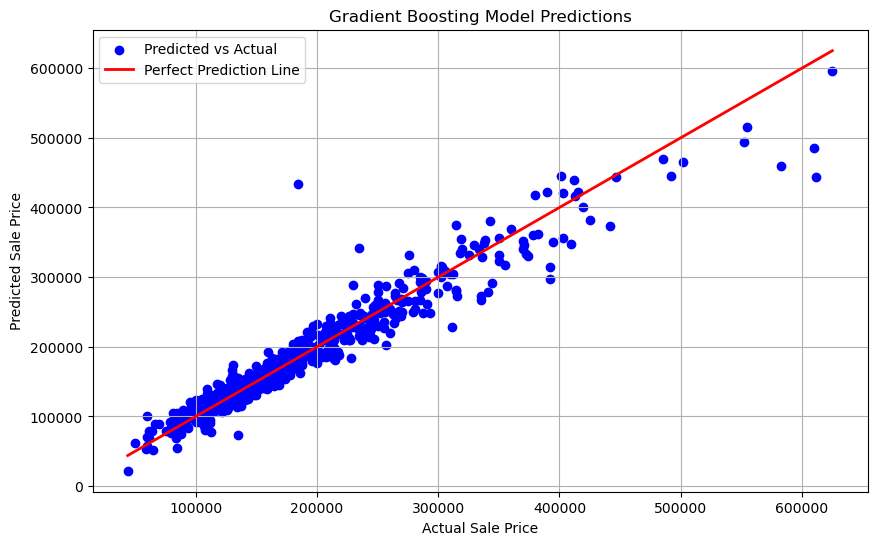

In [79]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_predict_gradient_boosting_regressor, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, label='Perfect Prediction Line')

plt.title('Gradient Boosting Model Predictions')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.legend()
plt.grid()
plt.show()


### Evaluation

In [80]:
rmse_gb = np.sqrt(mean_squared_error(y_test, y_predict_gradient_boosting_regressor))
mae_gb = mean_absolute_error(y_test, y_predict_gradient_boosting_regressor)
r2_gb = r2_score(y_test, y_predict_gradient_boosting_regressor)
print(f"Gradient Boosting Regressor RMSE: {rmse_gb}, MAE: {mae_gb}, R2: {r2_gb}")


Gradient Boosting Regressor RMSE: 24068.88096918662, MAE: 14809.345100928289, R2: 0.9277446126794426


## Random Forest Regressor

### Model

In [81]:
random_forest_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_regressor.fit(x_train, y_train)
y_predict_random_forest_regressor = random_forest_regressor.predict(x_test)

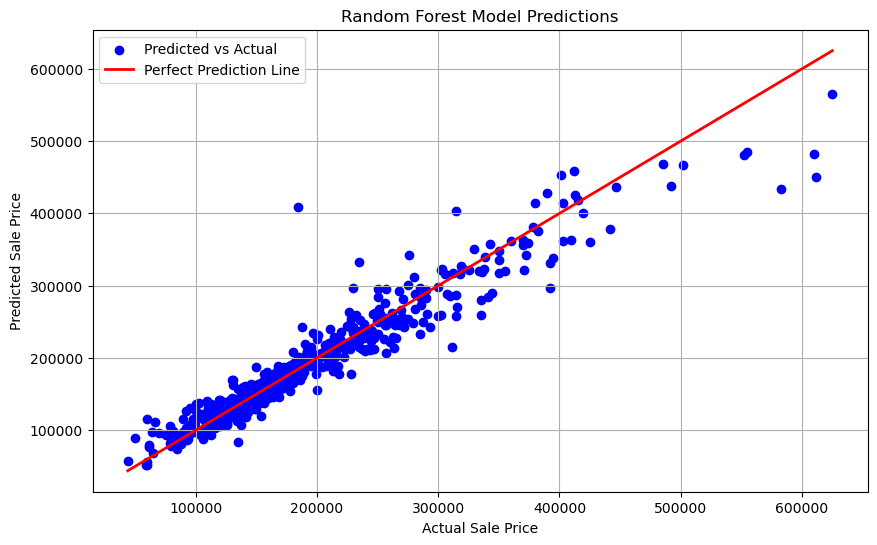

In [85]:
# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_predict_random_forest_regressor, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2, label='Perfect Prediction Line')

plt.title('Random Forest Model Predictions')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.legend()
plt.grid()
plt.show()

### Evaluation

In [84]:
rmse_rf = np.sqrt(mean_squared_error(y_test, y_predict_random_forest_regressor))
mae_rf = mean_absolute_error(y_test, y_predict_random_forest_regressor)
r2_rf = r2_score(y_test, y_predict_random_forest_regressor)
print(f"Random Forest Regressor RMSE: {rmse_rf}, MAE: {mae_rf}, R2: {r2_rf}")

Random Forest Regressor RMSE: 25119.28241064866, MAE: 15438.956911262798, R2: 0.9213003334356764
